In [1]:
from scipy.io import loadmat  # SciPy module that loads mat-files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam 

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, classification_report

mat = loadmat('mammography.mat')  # load mat-file
X,y = mat['X'], mat['y']

In [2]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=uint8), array([10923,   260]))

In [3]:
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,2,3,4,5,target
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,0
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,0
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,0
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,0
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,0


In [4]:
df.describe()

,0,1,2,3,4,5,target
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,11183.000000
mean,1.096536e-10,1.297595e-09,5.698113e-10,-2.435706e-09,-1.120680e-09,1.459483e-09,0.023250
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.150702
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01,0.000000
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01,0.000000
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01,0.000000
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00,0.000000
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00,1.000000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),df['target'], test_size=0.2, random_state=42, shuffle=True)

In [6]:
# encoding_dim=2

# input_dim = X_train.shape[1]

# autoencoder = Sequential()
# # encoder network
# autoencoder.add(Dense(1024, activation= 'PReLU', input_shape = (input_dim,)))
# autoencoder.add(Dense(512, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(256, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(256, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(256, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(256, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(128, activation= 'PReLU'))
# autoencoder.add(Dense(64, activation= 'PReLU'))
# autoencoder.add(Dense(32, activation= 'PReLU'))
# autoencoder.add(Dense(16, activation= 'PReLU'))
# autoencoder.add(Dense(encoding_dim, activation= 'PReLU'))
# #decoder network
# autoencoder.add(Dense(16, activation= 'PReLU'))
# autoencoder.add(Dense(32, activation= 'PReLU'))
# autoencoder.add(Dense(64, activation= 'PReLU'))
# autoencoder.add(Dense(128, activation= 'PReLU'))
# autoencoder.add(Dense(256, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(256, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(256, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(512, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(512, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(512, activation= 'PReLU'))
# autoencoder.add(Dropout(0.2))
# autoencoder.add(Dense(1024, activation= 'PReLU'))
# autoencoder.add(Dense(1,activation='sigmoid')) # output layer
# autoencoder.summary()

encoding_dim=2

input_dim = X_train.shape[1]

autoencoder = Sequential()
# encoder network
autoencoder.add(Dense(4096, activation= 'PReLU', input_shape = (input_dim,)))
autoencoder.add(Dense(2048, activation= 'PReLU'))
autoencoder.add(Dropout(0.4))
autoencoder.add(Dense(1024, activation= 'PReLU'))
autoencoder.add(Dropout(0.4))
autoencoder.add(Dense(256, activation= 'PReLU'))
autoencoder.add(Dense(128, activation= 'PReLU'))
autoencoder.add(Dense(32, activation= 'PReLU'))
autoencoder.add(Dense(encoding_dim, activation= 'PReLU'))
#decoder network
autoencoder.add(Dense(32, activation= 'PReLU'))
autoencoder.add(Dense(64, activation= 'PReLU'))
autoencoder.add(Dense(128, activation= 'PReLU'))
autoencoder.add(Dense(256, activation= 'PReLU'))
autoencoder.add(Dense(1024, activation= 'PReLU'))
autoencoder.add(Dropout(0.4))
autoencoder.add(Dense(2048, activation= 'PReLU'))
autoencoder.add(Dropout(0.4))
autoencoder.add(Dense(4096, activation= 'PReLU'))
autoencoder.add(Dense(1,activation='sigmoid')) # output layer
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              32768     
                                                                 
 dense_1 (Dense)             (None, 2048)              8392704   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2099200   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               262656    
                                                                 
 dense_4 (Dense)             (None, 128)               3

In [7]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(y_train), y = y_train)

early_stopping = EarlyStopping(monitor='val_loss', patience=100)
reducelr_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, min_lr=1e-6)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Recall'])
history = autoencoder.fit(X_train, y_train, batch_size=64, epochs=1000, verbose=1, validation_data = (X_test,y_test),  class_weight={0:class_weights[0],1:class_weights[1]}, callbacks=[early_stopping,reducelr_plateau])

score = autoencoder.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Accuracy:', score[1])

Epoch 1/1000
140/140 [==============================] - 23s 20ms/step - loss: 0.6610 - accuracy: 0.8651 - recall: 0.4381 - val_loss: 0.2811 - val_accuracy: 0.8556 - val_recall: 0.9400 - lr: 0.0010
Epoch 2/1000
140/140 [==============================] - 2s 16ms/step - loss: 0.5731 - accuracy: 0.7923 - recall: 0.8190 - val_loss: 0.3598 - val_accuracy: 0.8793 - val_recall: 0.9200 - lr: 0.0010
Epoch 3/1000
140/140 [==============================] - 2s 13ms/step - loss: 0.3623 - accuracy: 0.8854 - recall: 0.8381 - val_loss: 0.1664 - val_accuracy: 0.9557 - val_recall: 0.9000 - lr: 0.0010
Epoch 4/1000
140/140 [==============================] - 2s 13ms/step - loss: 0.3440 - accuracy: 0.8951 - recall: 0.8476 - val_loss: 0.2843 - val_accuracy: 0.9186 - val_recall: 0.9200 - lr: 0.0010
Epoch 5/1000
140/140 [==============================] - 2s 13ms/step - loss: 0.3458 - accuracy: 0.8735 - recall: 0.8619 - val_loss: 0.2001 - val_accuracy: 0.8972 - val_recall: 0.9200 - lr: 0.0010
Epoch 6/1000
140/14

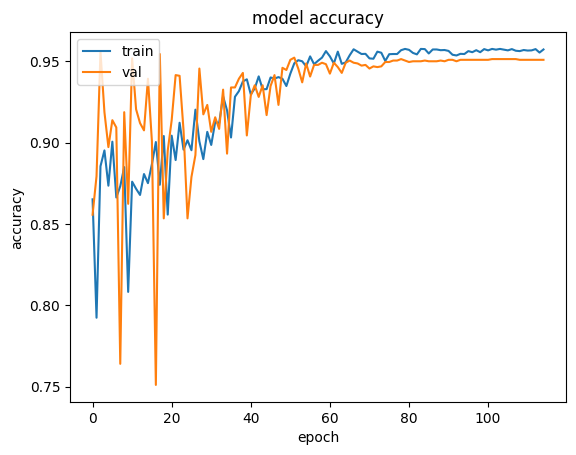

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

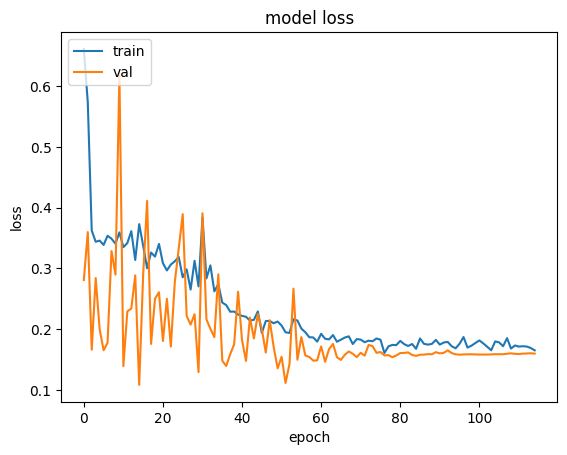

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

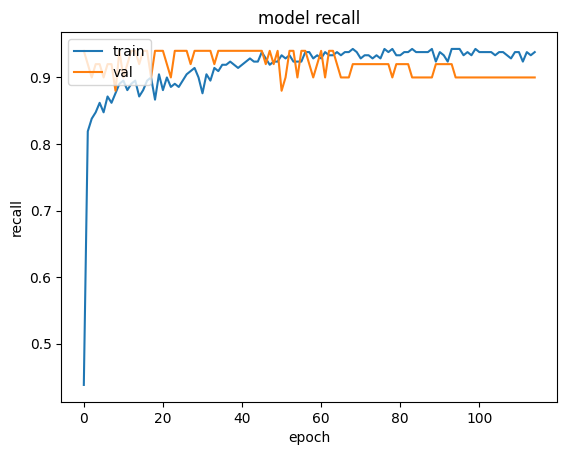

In [10]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
score

[0.16005836427211761, 0.9508270025253296, 0.8999999761581421]

# **ROC CURVE**

70/70 [==============================] - 1s 3ms/step
Best Threshold=0.257059, G-Mean=0.943


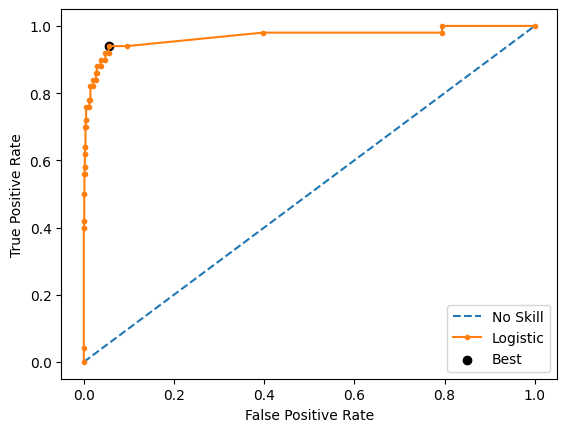

In [12]:
# predict probabilities
yhat = autoencoder.predict(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:,0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# **Precision-Recall Curve**

Best Threshold=0.957218, F-Score=0.768


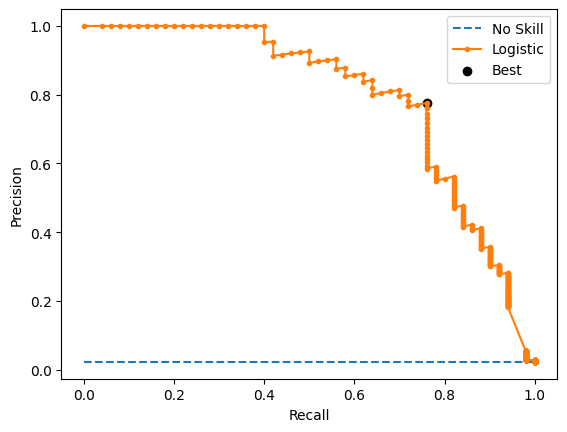

In [13]:
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

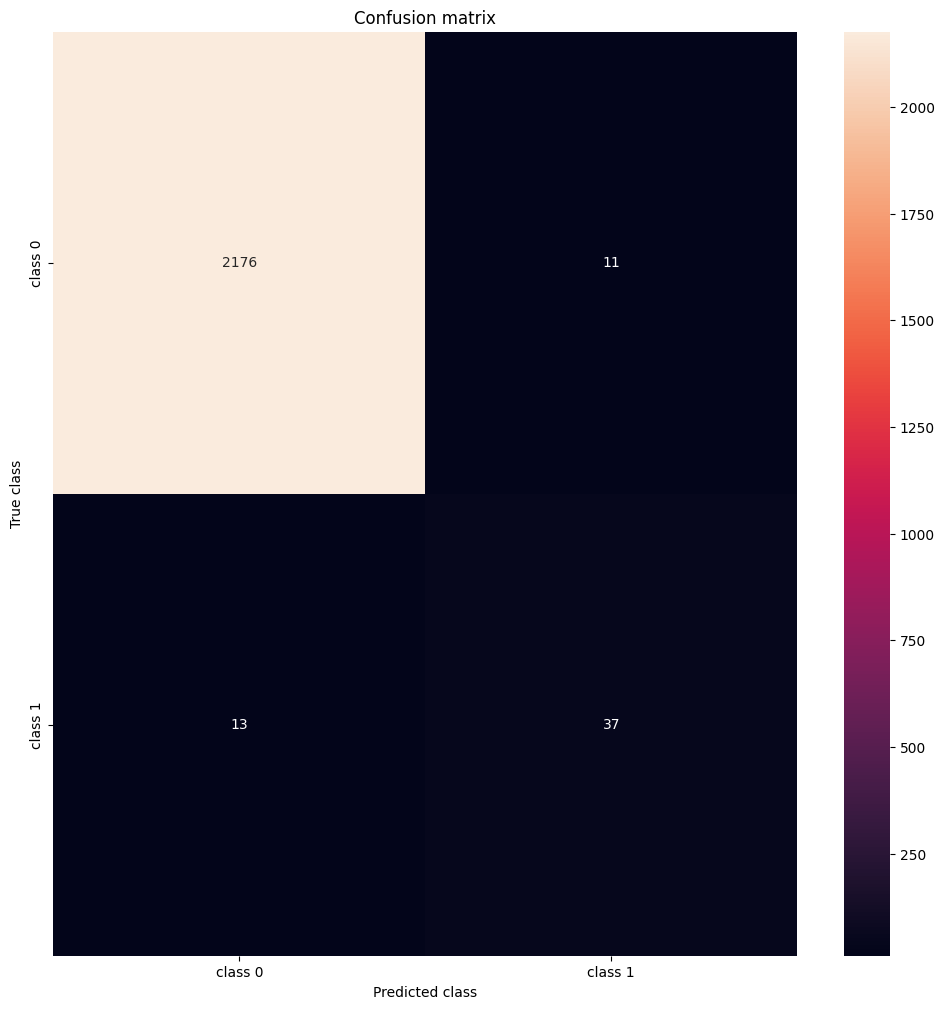

In [14]:
LABELS = ["class 0","class 1"]
threshold_fixed = thresholds[ix]
pred_y = [1 if e > threshold_fixed else 0 for e in yhat]
conf_matrix = confusion_matrix(y_test, pred_y)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [15]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2187
           1       0.77      0.74      0.76        50

    accuracy                           0.99      2237
   macro avg       0.88      0.87      0.87      2237
weighted avg       0.99      0.99      0.99      2237

